# Ch08 打造你的卷積神經網路

# 8-1 認識 MNIST 手寫辦識資料集

參考網址 : [Yann lecun](http://yann.lecun.com/exdb/mnist/)

In [4]:
# Ch8_1.py

import numpy as np
from keras.datasets import mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print(Y_train[0])

5


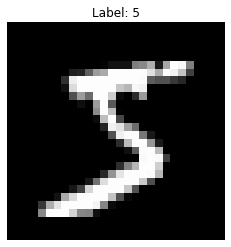

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="gray")
plt.title("Label: "+str(Y_train[0]))
plt.axis("off") # 座標關掉
plt.show()

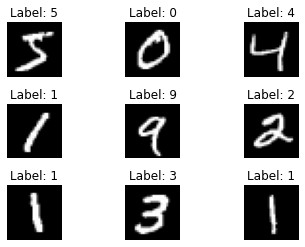

In [12]:
import numpy as np
from keras.datasets import mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

sub_plot= 330 
for i in range(0,9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title("Label: "+str(Y_train[i]))
    ax.axis("off")
    
plt.subplots_adjust(hspace = .5)
plt.show()

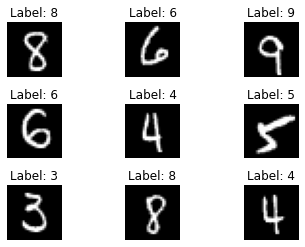

In [21]:
import numpy as np
from keras.datasets import mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

sub_plot= 330 
offset = 50001
for i in range(0,9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i+offset], cmap="gray")
    ax.set_title("Label: "+str(Y_train[i+offset]))
    ax.axis("off")
    
plt.subplots_adjust(hspace = .5)
plt.show()

### 8-2-1 MLP的資料預處理



In [22]:
X_train = X_train.reshape(X_train.shape[0],28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0],28*28).astype("float32")
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)


X_train Shape:  (60000, 784)
X_test Shape:  (10000, 784)


In [23]:
X_train = X_train / 255
X_test = X_test / 255

In [24]:
print(X_train[0][150:175])

[0.         0.         0.01176471 0.07058824 0.07058824 0.07058824
 0.49411765 0.53333336 0.6862745  0.10196079 0.6509804  1.
 0.96862745 0.49803922 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [25]:
from keras.utils import to_categorical 

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape: ", Y_train.shape)
print(Y_train[0])

Y_train Shape:  (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 8-2-2 使用MLP打造MNIST 手寫辨識

padding = "same" 讓系統自己補

In [29]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_dim=28*28, activation="relu"))
model.add(Dense(10,activation="softmax"))
#model.summary()

# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics=["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                   epochs=10, batch_size=128, verbose=2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3417 - acc: 0.9059 - val_loss: 0.1782 - val_acc: 0.9507
Epoch 2/10
 - 2s - loss: 0.1493 - acc: 0.9572 - val_loss: 0.1370 - val_acc: 0.9606
Epoch 3/10
 - 3s - loss: 0.1011 - acc: 0.9708 - val_loss: 0.1051 - val_acc: 0.9680
Epoch 4/10
 - 3s - loss: 0.0757 - acc: 0.9782 - val_loss: 0.0918 - val_acc: 0.9743
Epoch 5/10
 - 3s - loss: 0.0580 - acc: 0.9839 - val_loss: 0.0882 - val_acc: 0.9741
Epoch 6/10
 - 2s - loss: 0.0445 - acc: 0.9879 - val_loss: 0.0777 - val_acc: 0.9774
Epoch 7/10
 - 2s - loss: 0.0358 - acc: 0.9906 - val_loss: 0.0857 - val_acc: 0.9750
Epoch 8/10
 - 3s - loss: 0.0282 - acc: 0.9929 - val_loss: 0.0817 - val_acc: 0.9762
Epoch 9/10
 - 2s - loss: 0.0229 - acc: 0.9943 - val_loss: 0.0784 - val_acc: 0.9757
Epoch 10/10
 - 2s - loss: 0.0175 - acc: 0.9960 - val_loss: 0.0777 - val_acc: 0.9769


In [30]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


60000/60000 [==============================] - 2s 40us/step
訓練資料集的準確度 = 0.99
10000/10000 [==============================] - 0s 35us/step
測試資料集的準確度 = 0.98


In [31]:
model = Sequential()
model.add(Dense(784, input_dim=28*28, activation="relu"))
model.add(Dense(10,activation="softmax"))
#model.summary()

# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics=["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                   epochs=10, batch_size=128, verbose=2)

loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.2799 - acc: 0.9211 - val_loss: 0.1427 - val_acc: 0.9592
Epoch 2/10
 - 6s - loss: 0.1132 - acc: 0.9679 - val_loss: 0.1059 - val_acc: 0.9699
Epoch 3/10
 - 5s - loss: 0.0715 - acc: 0.9791 - val_loss: 0.0888 - val_acc: 0.9730
Epoch 4/10
 - 6s - loss: 0.0489 - acc: 0.9859 - val_loss: 0.0774 - val_acc: 0.9771
Epoch 5/10
 - 6s - loss: 0.0358 - acc: 0.9898 - val_loss: 0.0709 - val_acc: 0.9770
Epoch 6/10
 - 7s - loss: 0.0264 - acc: 0.9924 - val_loss: 0.0756 - val_acc: 0.9783
Epoch 7/10
 - 6s - loss: 0.0177 - acc: 0.9953 - val_loss: 0.0720 - val_acc: 0.9784
Epoch 8/10
 - 5s - loss: 0.0127 - acc: 0.9971 - val_loss: 0.0758 - val_acc: 0.9789
Epoch 9/10
 - 6s - loss: 0.0101 - acc: 0.9978 - val_loss: 0.0762 - val_acc: 0.9797
Epoch 10/10
 - 5s - loss: 0.0086 - acc: 0.9982 - val_loss: 0.0776 - val_acc: 0.9790
60000/60000 [==============================] - 6s 97us/step
訓練資料集的準確度 = 0.99
10000/10000 [=============================

In [33]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(256, input_dim=28*28, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dense(10,activation="softmax"))
#model.summary()

# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics=["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                   epochs=10, batch_size=128, verbose=2)

loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.4041 - acc: 0.8763 - val_loss: 0.1516 - val_acc: 0.9551
Epoch 2/10
 - 3s - loss: 0.1931 - acc: 0.9418 - val_loss: 0.1270 - val_acc: 0.9600
Epoch 3/10
 - 3s - loss: 0.1494 - acc: 0.9542 - val_loss: 0.1039 - val_acc: 0.9681
Epoch 4/10
 - 3s - loss: 0.1296 - acc: 0.9602 - val_loss: 0.0871 - val_acc: 0.9738
Epoch 5/10
 - 3s - loss: 0.1120 - acc: 0.9653 - val_loss: 0.0849 - val_acc: 0.9739
Epoch 6/10
 - 3s - loss: 0.1008 - acc: 0.9679 - val_loss: 0.0864 - val_acc: 0.9737
Epoch 7/10
 - 3s - loss: 0.0933 - acc: 0.9707 - val_loss: 0.0817 - val_acc: 0.9767
Epoch 8/10
 - 3s - loss: 0.0864 - acc: 0.9728 - val_loss: 0.0772 - val_acc: 0.9765
Epoch 9/10
 - 3s - loss: 0.0793 - acc: 0.9743 - val_loss: 0.0794 - val_acc: 0.9776
Epoch 10/10
 - 4s - loss: 0.0752 - acc: 0.9760 - val_loss: 0.0712 - val_acc: 0.9790
6000

### 8-3-2 CNN的資料預處理

* 將特徵資料(樣本數, 28, 28) 形狀轉換成 4D 張量(樣本數, 28, 28, 1) 形狀

In [34]:
# Ch8_3_2.py
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype("float32")
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)


X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


In [35]:
# 正規化 
X_train = X_train / 255
X_test = X_test / 255
# One-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Y_train Shape: ", Y_train.shape)
print(Y_train[0])

Y_train Shape:  (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [43]:
# Ch8_3_3.py
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten # 一維攤平
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

# 定義模型
model = Sequential()
# 定義第 1 組的卷積和池化層, 因為padding, 所以矩陣還是 28*28
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(28, 28, 1), activation="relu"))
# 變成 14*14 的矩陣 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 定義第 2 組卷積和池化層
model.add(Conv2D(32, kernel_size=(5, 5), padding="same",
                activation="relu"))
# 變成 7*7 的矩陣 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten()) # 攤平
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)             

In [44]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 54s - loss: 0.3974 - acc: 0.8733 - val_loss: 0.0861 - val_acc: 0.9748
Epoch 2/10
 - 47s - loss: 0.1394 - acc: 0.9573 - val_loss: 0.0593 - val_acc: 0.9817
Epoch 3/10
 - 48s - loss: 0.1007 - acc: 0.9681 - val_loss: 0.0499 - val_acc: 0.9840
Epoch 4/10
 - 46s - loss: 0.0925 - acc: 0.9721 - val_loss: 0.0461 - val_acc: 0.9855
Epoch 5/10
 - 48s - loss: 0.0780 - acc: 0.9770 - val_loss: 0.0389 - val_acc: 0.9890
Epoch 6/10
 - 47s - loss: 0.0715 - acc: 0.9779 - val_loss: 0.0371 - val_acc: 0.9886
Epoch 7/10
 - 47s - loss: 0.0636 - acc: 0.9800 - val_loss: 0.0386 - val_acc: 0.9891
Epoch 8/10
 - 47s - loss: 0.0562 - acc: 0.9823 - val_loss: 0.0345 - val_acc: 0.9902
Epoch 9/10
 - 47s - loss: 0.0565 - acc: 0.9824 - val_loss: 0.0324 - val_acc: 0.9907
Epoch 10/10
 - 50s - loss: 0.0505 - acc: 0.9848 - val_loss: 0.0304 - val_acc: 0.9914

Testing ...
訓練資料集的準確度 = 0.99
測試資料集的準確度 = 0.99


Saving Model: mnist.h5 ...


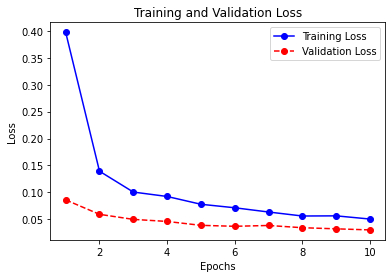

In [47]:
# 儲存Keras模型
print("Saving Model: mnist.h5 ...")
model.save("mnist.h5")
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
